# Modeling

I have clean data that I've investigated. I'm ready to model. In this notebook, I will run all of my models and then evaluate in a separate notebook. As I run new models, I will want add evaluation metrics to a dataframe and choose my best one based on Accuracy & F1 Score.

Before I start, I have to load in my libraries and read my data in.


##### This notebook is a work in progress and will be updated.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

In [152]:
global summary_df
summary_df = pd.DataFrame(columns=['Model', 'N','Accuracy', 'Precision', 'Recall', 'F1 Score'])
summary_df

,Model,N,Accuracy,Precision,Recall,F1 Score


In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_pickle('../mod5project/pickle_files/cleaned_df')
print(df.shape)
df.head()

(5492, 121)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [5]:
### drop columns that have 'inf' values

df.drop(columns = ['Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                   'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                   'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                   'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame', 'TD_OtherperGame', 'Ttl_TDsperGame', 
                   'TwoPT_ConversionperGame', 'SafetyperGame', 'TTL_PointsperGame'], inplace=True)
print(df.shape)
df.head()

(5492, 103)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,5.00,0.00,0.00,30.00,72,6,Receivers
4,Tom Brady,QB,Michigan,2000,76,211,5.28,24.50,9.61,99.00,7.20,4.38,New England Patriots,6th,199th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,16.36,26.82,201.55,1.45,0.55,11.00,34.00,-31.00,-0.90,1.00,0.00,0.00,0.0

In [6]:
### dummy data

dummies = pd.get_dummies(df['School'], drop_first=True)
df = pd.concat([df, dummies], axis = 1)
dummies = pd.get_dummies(df['Position'], drop_first=True)
df = pd.concat([df, dummies], axis =1)
dummies = pd.get_dummies(df['Pos'], drop_first=True)
df = pd.concat([df, dummies], axis =1)
print(df.shape)
df.head()

(5492, 271)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,Feet,Inches,Pos,Akron,Ala-Birmingham,Alabama,Appalachian State,Arizona,Arizona State,Arkansas,Arkansas State,Army,Auburn,BYU,Ball State,Baylor,Boise State,Boston Col.,Boston College,Bowling Green,Buffalo,California,Central Florida,Central Michigan,Charlotte,Cincinnati,Clemson,Colorado,Colorado State,Connecticut,Duke,East Carolina,East. Kentucky,East. Michigan,Florida,Florida Atlantic,Florida International,Florida State,Fresno State,Georgia,Georgia Southern,Georgia State,Georgia Tech,Hawaii,Houston,Idaho,Idaho State,Illinois,Indiana,Iowa,Iowa State,Kansas,Kansas State,Kent State,Kentucky,LSU,La-Monroe,Liberty,Louisiana,Louisiana Tech,Louisiana-Lafayette,Louisville,Marshall,Maryland,Massachusetts,Memphis,Miami,Miami (FL),Miami (OH),Michigan,Michigan State,Middle Tennessee State,Minnesota,Mississippi,Mississippi State,Missouri,Navy,Nebraska,Nevada,New Hampshire,New Mexico,New Mexico State,North Carolina,North Carolina State,North Texas,Northern Arizona,Northern Illinois,Northwestern,Northwestern St. (LA),Notre Dame,Ohio,Ohio State,Oklahoma,Oklahoma State,Old Dominion,Oregon,Oregon State,Penn State,Pittsburgh,Purdue,Rice,Rutgers,SMU,San Diego State,San Jose State,South Alabama,South Carolina,South Florida,Southern Miss,Stanford,Syracuse,TCU,Temple,Tennessee,Texas,Texas A&M,Texas State,Texas Tech,Texas-El Paso,Texas-San Antonio,Toledo,Troy,Tulane,Tulsa,UCF,UCLA,UNLV,USC,Utah,Utah State,Vanderbilt,Virginia,Virginia Tech,Wake Forest,Washington,Washington State,West Virginia,West. Michigan,Western Kentucky,Western Michigan,Wisconsin,Wyoming,CB,DB,DE,DL,DT,EDGE,FB,FS,ILB,K,LB,LS,NT,OG,OL,OLB,OT,P,QB,RB,S,SS,TE,WR,LBs,OffensiveLine,QBs,Receivers,SpecialTeams
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0,Receivers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [7]:
target = df['Round']
features = df.drop(columns=['PlayerName', 'Position','School', 'CombineYear', 'Draft Team', 'Pick', 
                                     'Round', 'Draft Year', 'Feet', 'Inches',  'Pos'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
X_train.head()

,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,Akron,Ala-Birmingham,Alabama,Appalachian State,Arizona,Arizona State,Arkansas,Arkansas State,Army,Auburn,BYU,Ball State,Baylor,Boise State,Boston Col.,Boston College,Bowling Green,Buffalo,California,Central Florida,Central Michigan,Charlotte,Cincinnati,Clemson,Colorado,Colorado State,Connecticut,Duke,East Carolina,East. Kentucky,East. Michigan,Florida,Florida Atlantic,Florida International,Florida State,Fresno State,Georgia,Georgia Southern,Georgia State,Georgia Tech,Hawaii,Houston,Idaho,Idaho State,Illinois,Indiana,Iowa,Iowa State,Kansas,Kansas State,Kent State,Kentucky,LSU,La-Monroe,Liberty,Louisiana,Louisiana Tech,Louisiana-Lafayette,Louisville,Marshall,Maryland,Massachusetts,Memphis,Miami,Miami (FL),Miami (OH),Michigan,Michigan State,Middle Tennessee State,Minnesota,Mississippi,Mississippi State,Missouri,Navy,Nebraska,Nevada,New Hampshire,New Mexico,New Mexico State,North Carolina,North Carolina State,North Texas,Northern Arizona,Northern Illinois,Northwestern,Northwestern St. (LA),Notre Dame,Ohio,Ohio State,Oklahoma,Oklahoma State,Old Dominion,Oregon,Oregon State,Penn State,Pittsburgh,Purdue,Rice,Rutgers,SMU,San Diego State,San Jose State,South Alabama,South Carolina,South Florida,Southern Miss,Stanford,Syracuse,TCU,Temple,Tennessee,Texas,Texas A&M,Texas State,Texas Tech,Texas-El Paso,Texas-San Antonio,Toledo,Troy,Tulane,Tulsa,UCF,UCLA,UNLV,USC,Utah,Utah State,Vanderbilt,Virginia,Virginia Tech,Wake Forest,Washington,Washington State,West Virginia,West. Michigan,Western Kentucky,Western Michigan,Wisconsin,Wyoming,CB,DB,DE,DL,DT,EDGE,FB,FS,ILB,K,LB,LS,NT,OG,OL,OLB,OT,P,QB,RB,S,SS,TE,WR,LBs,OffensiveLine,QBs,Receivers,SpecialTeams
2422,74,236,4.71,37.50,24.00,120.00,3.59,2.15,10.00,47.00,39.00,86.00,11.00,2.00,1.00,13.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3704,80,355,5.21,23.50,20.00,97.00,8.23,4.78,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

## Functions

In [67]:
def baseline_model(features, target):
    model = 'baseline'
    
    n = 0
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
    
    dummy = DummyClassifier(strategy='uniform', random_state=17)
    dummy.fit(X_train, y_train)
    
    predictions = dummy.predict(X_test)
    
    accuracy = dummy.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [153]:
baseline_model(features, target)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12


In [69]:
def logistic_regression(features, target):
    model_name = 'logistic regression'
    
    n = 0
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
    
    model = LogisticRegression().fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [154]:
logistic_regression(features, target)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17


In [135]:
def knn(features, target, n):
    model_name = 'knn'
    
    N = n
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
    
    model = KNeighborsClassifier(n_neighbors=n)
    model = model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df


In [155]:
knn(features, target, 3)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20


In [156]:
knn(features, target, 5)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21


In [157]:
knn(features, target, 4)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20


In [158]:
knn(features, target, 2)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19


In [143]:
def decision_tree(features, target, depth):
    model_name = 'decision tree'
    
    n = depth
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
    
    model = DecisionTreeClassifier(max_depth = depth)
    model = model.fit(X_train, y_train)    
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [159]:
decision_tree(features, target, 2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17


In [160]:
decision_tree(features, target, 5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21


In [161]:
decision_tree(features, target, 10)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25


In [151]:
def random_forest(features, target, depth):
    model_name = 'random forest'
    
    n = depth
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
    
    model = RandomForestClassifier(max_depth = depth, n_estimators = 300)
    model = model.fit(X_train, y_train)    
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [162]:
random_forest(features, target, 2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [163]:
random_forest(features, target, 3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [164]:
random_forest(features, target, 5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [165]:
def adaboost(features, target, n_estimators):
    model_name = 'adaboost'
    
    n = n_estimators
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
 
    model = AdaBoostClassifier(n_estimators=n, base_estimator= None,learning_rate=1, random_state = 17)
    model = model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [166]:
adaboost(features, target, 100)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [167]:
adaboost(features, target, 200)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [168]:
adaboost(features, target, 500)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [169]:
def xgboost_model(features, target, max_depth):
    model_name = 'xgboost'
    
    n = max_depth
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
 
    model = XGBClassifier(max_depth = n, n_jobs = -1)
    model = model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [170]:
xgboost_model(features, target, 2)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [171]:
xgboost_model(features, target, 3)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [172]:
xgboost_model(features, target, 5)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [173]:
xgboost_model(features, target, 10)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


In [179]:
def naive_bayes(features, target):
    model_name = 'naive bayes'
    
    n = 0
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17, test_size=0.2)
    
    model = GaussianNB()
    model = model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    
    global summary_df
    summary_df = summary_df.append({'Model': model_name,
                                    'N': n,
                                    'Accuracy': accuracy, 
                                    'Precision': precision, 
                                    'Recall': recall, 
                                    'F1 Score': f1_score}, ignore_index=True)
    return summary_df

In [180]:
naive_bayes(features, target)

,Model,N,Accuracy,Precision,Recall,F1 Score
0,baseline,0,0.11,0.14,0.11,0.12
1,logistic regression,0,0.31,0.13,0.31,0.17
2,knn,3,0.21,0.21,0.21,0.20
3,knn,5,0.23,0.21,0.23,0.21
4,knn,4,0.22,0.20,0.22,0.20
5,knn,2,0.18,0.24,0.18,0.19
6,decision tree,2,0.30,0.12,0.30,0.17
7,decision tree,5,0.30,0.19,0.30,0.21
8,decision tree,10,0.29,0.23,0.29,0.25
9,random forest,2,0.31,0.09,0.31,0.14


## Model Evaluation

In [192]:
rounds = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Not Drafted']

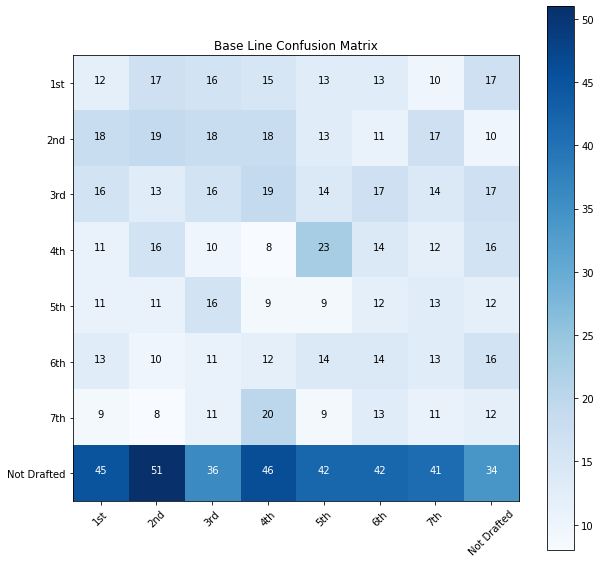

In [199]:
base_model = DummyClassifier(strategy='uniform', random_state=17)
base_model.fit(X_train, y_train)

predictions = base_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cmap=plt.cm.Blues

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Base Line Confusion Matrix")
tick_marks = np.arange(len(rounds))
plt.xticks(tick_marks, rounds, rotation=45)
plt.yticks(tick_marks, rounds)
plt.colorbar()

fmt = '.0f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")


plt.show()

In [200]:
summary_df.sort_values('Accuracy', ascending=False)[:5]

,Model,N,Accuracy,Precision,Recall,F1 Score
15,xgboost,2,0.33,0.21,0.33,0.23
16,xgboost,3,0.32,0.20,0.32,0.23
17,xgboost,5,0.31,0.23,0.31,0.25
1,logistic regression,0,0.31,0.13,0.31,0.17
11,random forest,5,0.31,0.15,0.31,0.15


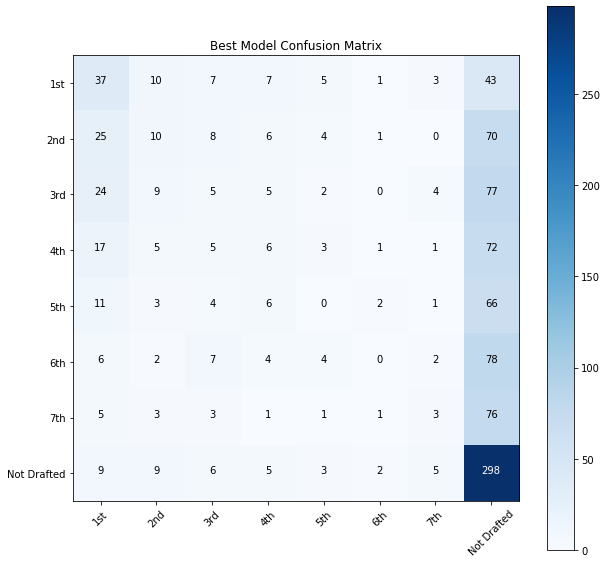

In [202]:
best_model = XGBClassifier(max_depth = 2, n_jobs = -1)
best_model.fit(X_train, y_train)
    
predictions = best_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cmap=plt.cm.Blues

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Best Model Confusion Matrix")
tick_marks = np.arange(len(rounds))
plt.xticks(tick_marks, rounds, rotation=45)
plt.yticks(tick_marks, rounds)
plt.colorbar()

fmt = '.0f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")


plt.show()

In [204]:
# importances = best_model.feature_importances_
# std = np.std([best_model.feature_importances_ for tree in best_model.estimators_], axis=0)
# indices = np.argsort(importances)[::-1]




# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(features.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(features.shape[1]), indices)
# plt.xlim([-1, features.shape[1]])
# plt.show()